# Spotify Dataset Analysis
# Author: Mohan Krishna
# This project analyzes a dataset of popular Spotify tracks using various statistical and machine learning techniques.
# It includes data cleaning, exploratory data analysis, and a predictive model for track popularity.

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [31]:

df = pd.read_csv('spotify_dataset.csv', encoding='ISO-8859-1')


df = df.drop(columns=['Unnamed: 0'])


df.rename(columns={'Track.Name':'track_name', 'Artist.Name':'artist_name', 'Beats.Per.Minute':'beats_per_minute',
                   'Loudness..dB..':'Loudness(dB)', 'Valence.':'Valence', 'Length.':'Length', 
                   'Acousticness..':'Acousticness', 'Speechiness.':'Speechiness'}, inplace=True)

df.head()


,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [33]:
# Check for missing values
print(df.isnull().sum())

# If there are any missing values, fill them with 0
df.fillna(0, inplace=True)

# Basic data statistics
print(df.describe())

track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64
       beats_per_minute     Energy  Danceability  Loudness(dB)   Liveness  \
count         50.000000  50.000000      50.00000     50.000000  50.000000   
mean         120.060000  64.060000      71.38000     -5.660000  14.660000   
std           30.898392  14.231913      11.92988      2.056448  11.118306   
min           85.000000  32.000000      29.00000    -11.000000   5.000000   
25%           96.000000  55.250000      67.00000     -6.750000   8.000000   
50%          104.500000  66.500000      73.50000     -6.000000  11.000000   
75%          137.500000  74.750000      79.75000     -4.000000  15.750000   
max          190.000000  88.000000      90.00000     -2.000000  58.000000   

       

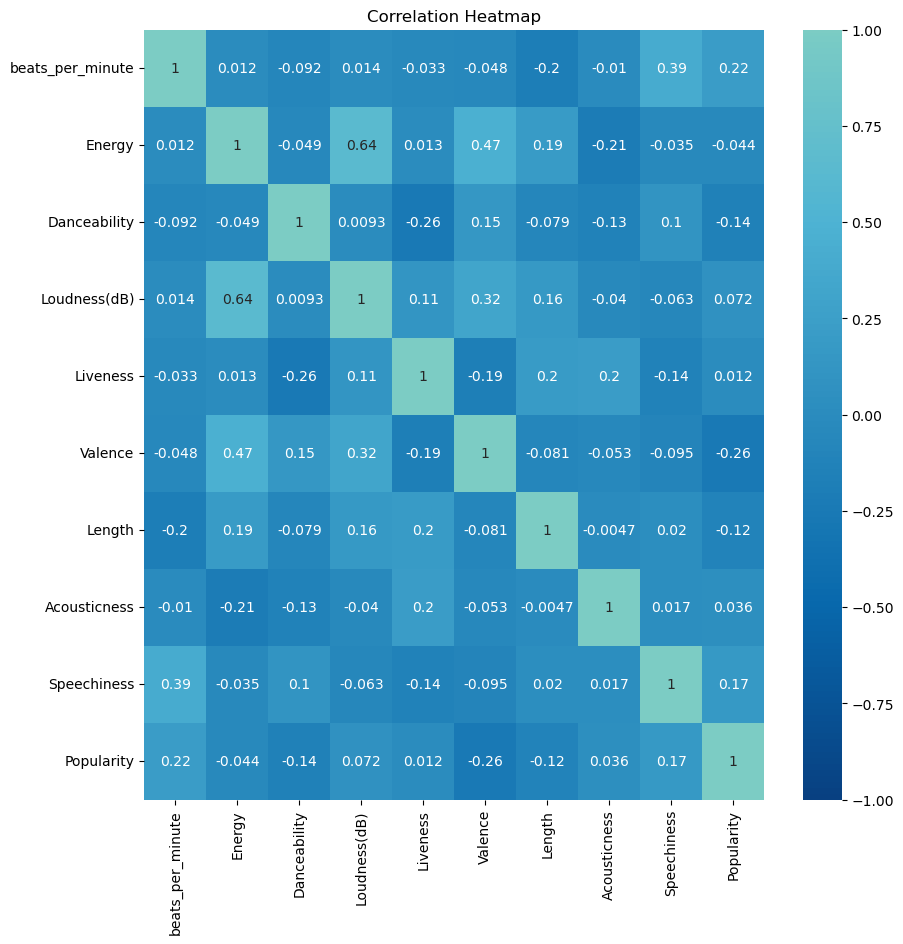

In [35]:
# Correlation matrix to understand relationships between features
corr = df.corr(method='spearman')
plt.figure(figsize=(10, 10))
plt.title('Correlation Heatmap')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='GnBu_r', center=1)
plt.show()

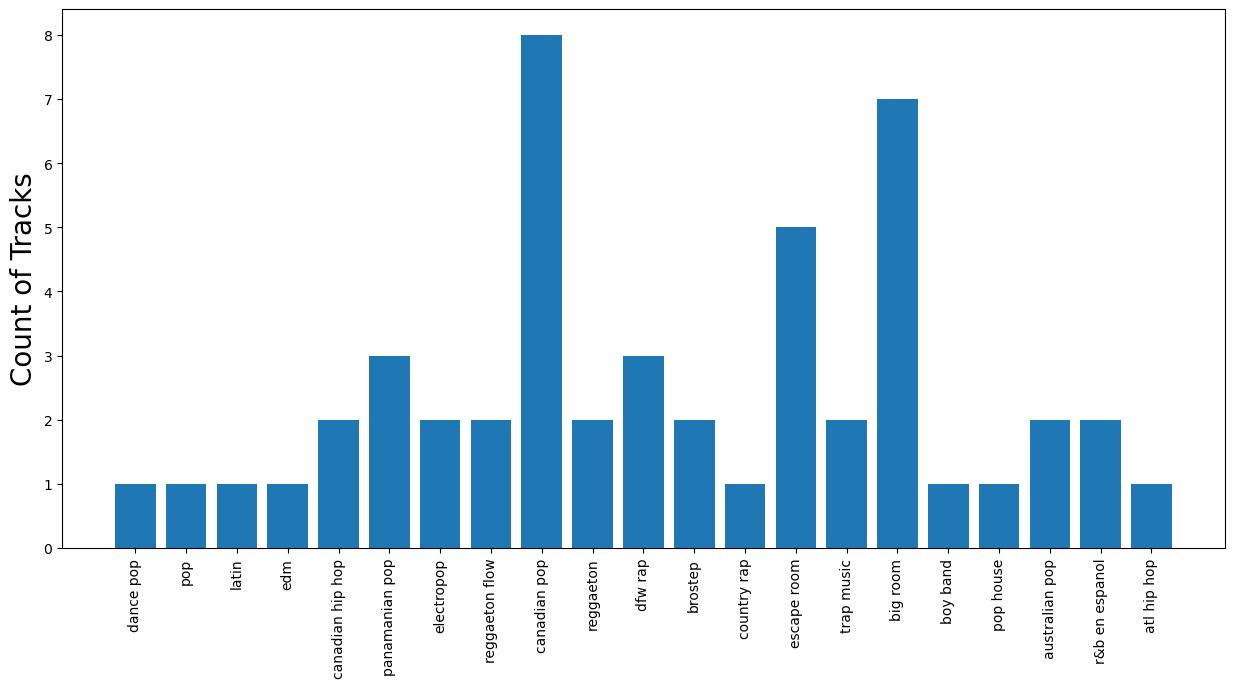

In [37]:
# Visualization of Genre distribution
genre_groupby = df.groupby('Genre')['track_name'].agg(len)
plt.figure(figsize=(15, 7))
xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
         'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
         'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
         'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
         'r&b en espanol', 'atl hip hop']
length = np.arange(len(xtick))
plt.bar(length, genre_groupby)
plt.xticks(length, xtick)
plt.xticks(rotation=90)
plt.ylabel('Count of Tracks', fontsize=20)
plt.show()

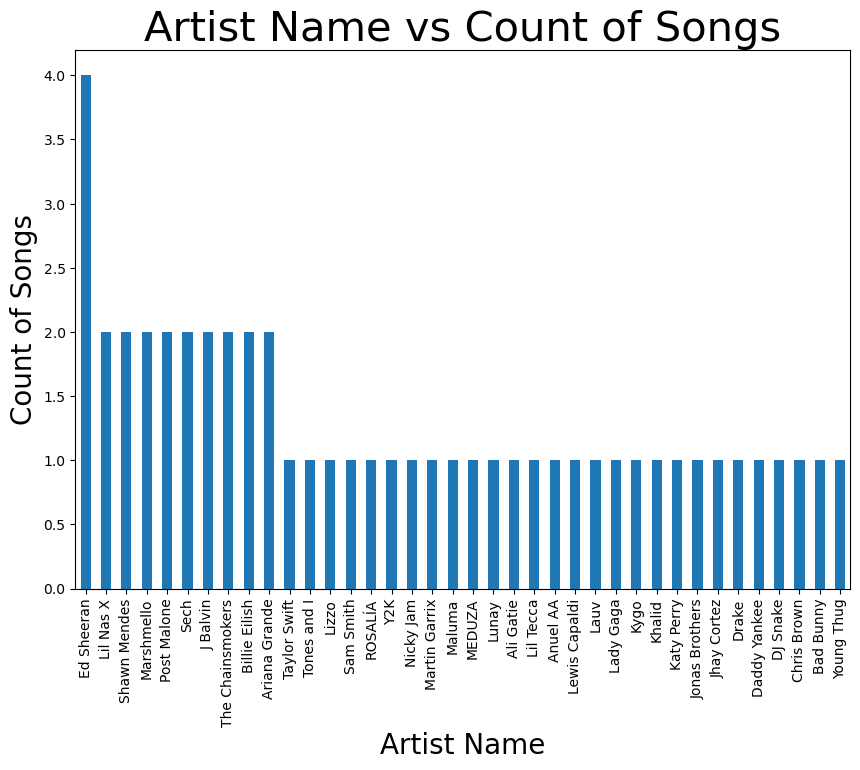

In [39]:
# Number of songs by an artist
plt.figure(figsize=(10, 7))
df.groupby('artist_name')['track_name'].agg(len).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Artist Name', fontsize=20)
plt.ylabel('Count of Songs', fontsize=20)
plt.title('Artist Name vs Count of Songs', fontsize=30)
plt.show()

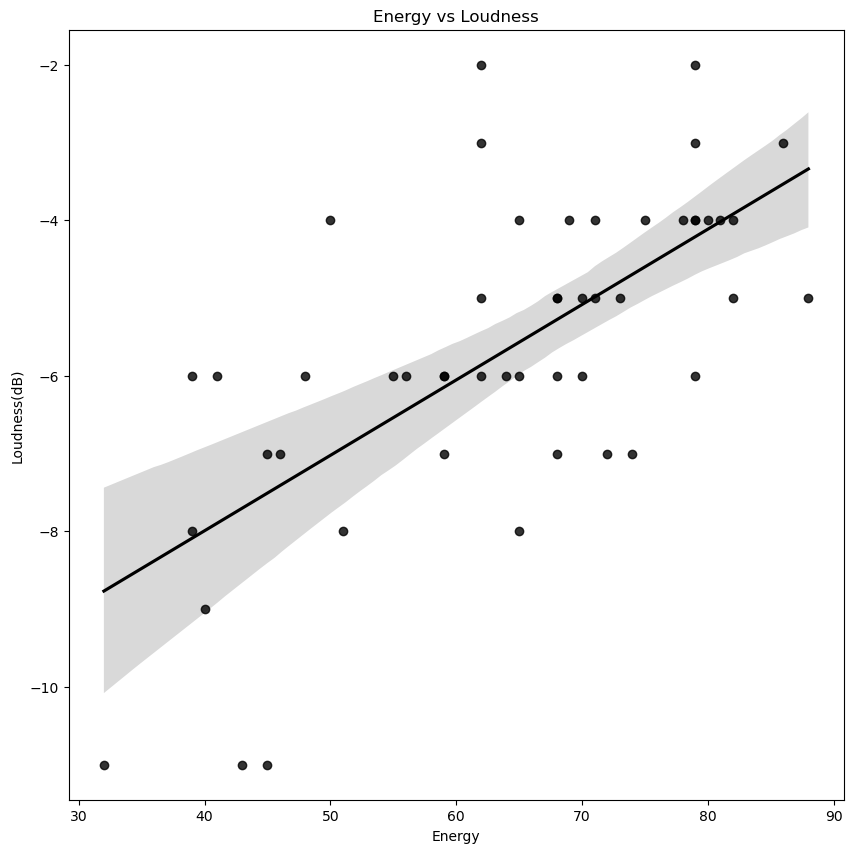

In [41]:
# Analyzing the relationship between Energy and Loudness
plt.figure(figsize=(10, 10))
sns.regplot(x='Energy', y='Loudness(dB)', data=df, color='black')
plt.title('Energy vs Loudness')
plt.show()

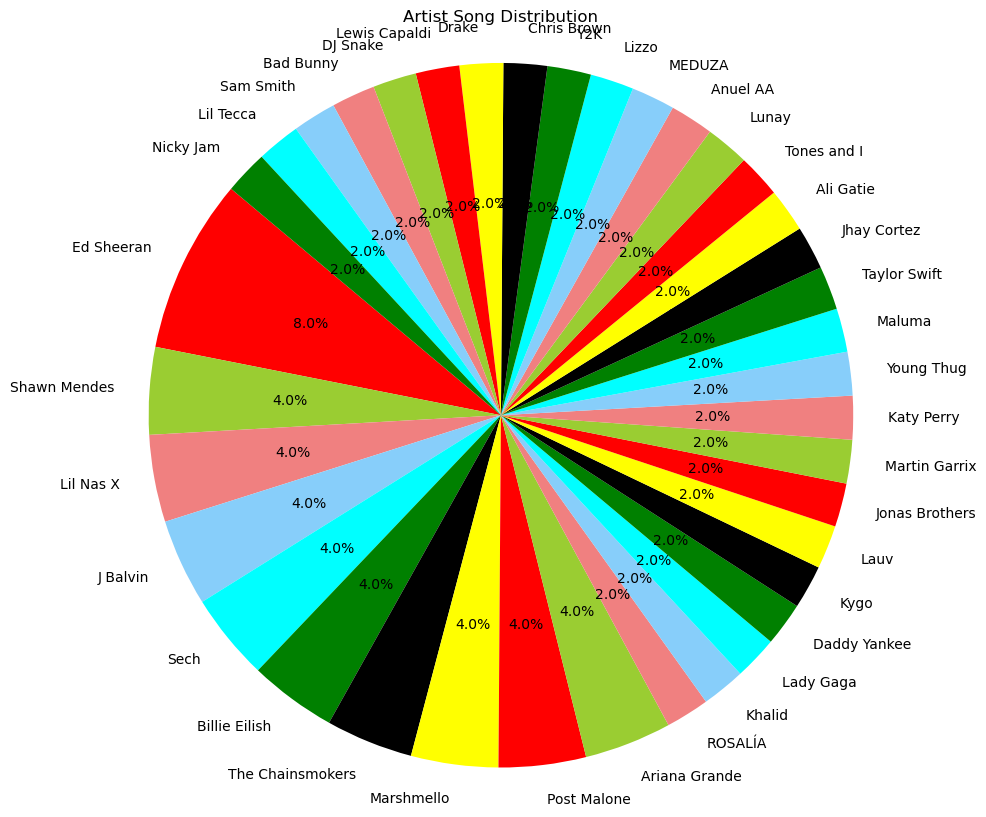

In [43]:
# Pie chart of top artists by song count
labels = df.artist_name.value_counts().index
sizes = df.artist_name.value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue', 'cyan', 'green', 'black', 'yellow']
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Artist Song Distribution')
plt.show()

In [47]:
# Train-test split for machine learning model
X = df.loc[:, ['Energy', 'Danceability', 'Length', 'Loudness(dB)', 'Acousticness']].values
y = df.loc[:, 'Popularity'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [49]:
# Linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predicted vs Actual values
y_pred = regressor.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       89  87.638549
1       89  87.801842
2       88  87.504207
3       80  87.561699
4       85  88.098675
5       86  87.755355
6       88  87.495072
7       89  87.489517
8       88  87.430518
9       89  87.729801
10      89  87.531288
11      78  87.267113
12      91  88.293439
13      91  87.288000
14      91  88.107058


In [53]:
# Error analysis
MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', MSE)

Mean Squared Error: 13.02543638050829


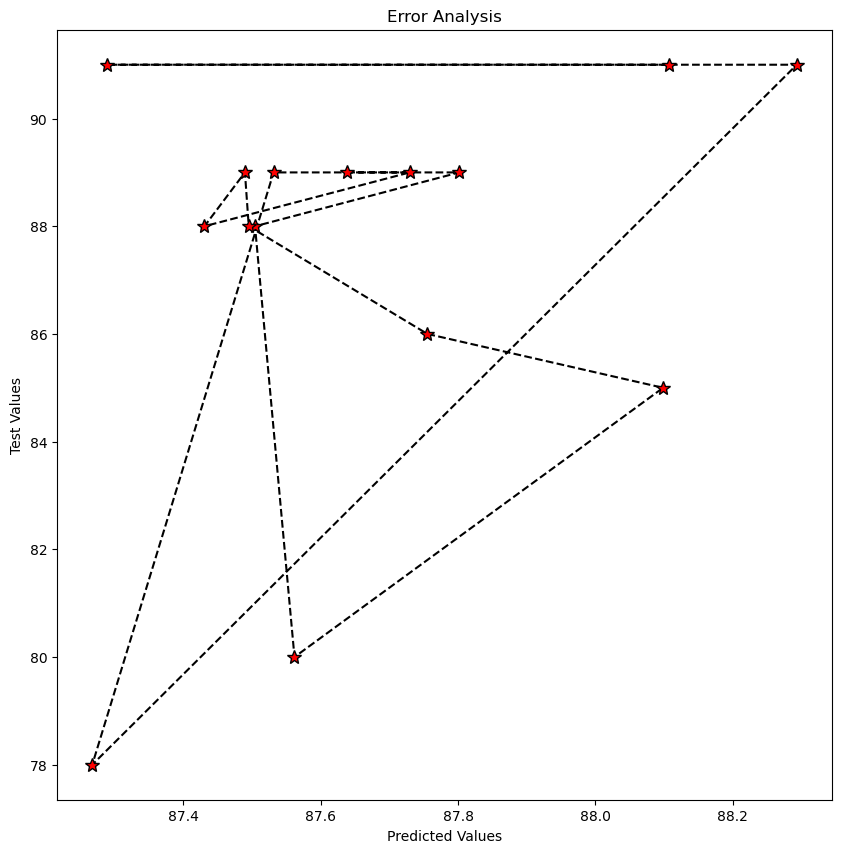

In [55]:
# Plotting Error Analysis
plt.figure(figsize=(10, 10))
plt.plot(y_pred, y_test, color='black', linestyle='dashed', marker='*', markerfacecolor='red', markersize=10)
plt.title('Error Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Test Values')
plt.show()

In [57]:
# Cross validation score
mse = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
mse_mean = np.mean(mse)
print('Cross-validated MSE:', abs(mse_mean))

Cross-validated MSE: 30.649516015364203


In [59]:
# Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [61]:
# Actual vs Predicted for Naive Bayes
df_gnb = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_gnb})
print(df_gnb)

    Actual  Predicted
0       89         89
1       89         88
2       88         90
3       80         92
4       85         88
5       86         84
6       88         90
7       89         87
8       88         87
9       89         88
10      89         91
11      78         83
12      91         91
13      91         90
14      91         88


In [63]:
# Support Vector Classifier model
LinSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
LinSVC.fit(X_train, y_train)
y_pred_svc = LinSVC.predict(X_test)

In [65]:
# Actual vs Predicted for SVC
df_svc = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svc})
print(df_svc)

    Actual  Predicted
0       89         95
1       89         84
2       88         84
3       80         84
4       85         84
5       86         84
6       88         84
7       89         84
8       88         84
9       89         95
10      89         84
11      78         95
12      91         70
13      91         84
14      91         84


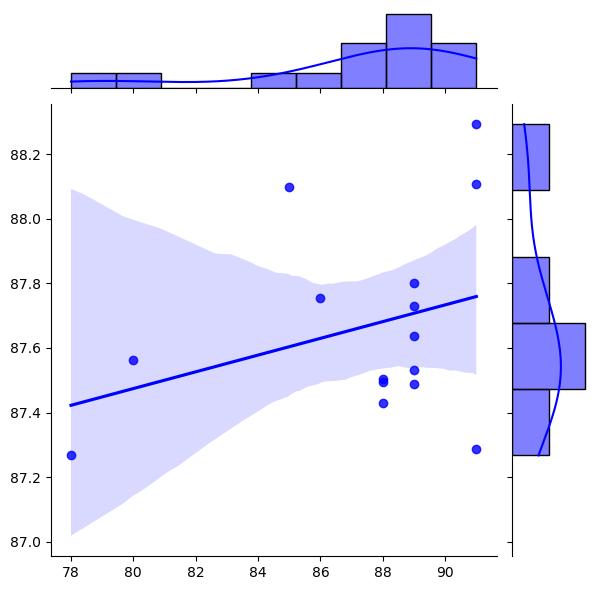

In [67]:
# Joint plot for prediction comparison
sns.jointplot(x=y_test, y=y_pred, kind='reg', color='b')
plt.show()